In [55]:
import pandas as pd

In [56]:
df=pd.read_csv('/Users/shay/Desktop/MIT/Courses/Machine Learning/Project/clean_loan_dataNov17.csv')

In [57]:
X=df.loc[:, df.columns != "loan_status"] #all your features

In [58]:
X

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,...,home_ownership_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,term_months_ 60
0,5000,4975.0,162.87,24000.00,27.65,1,3,0,9,0,...,1,1,0,0,0,0,0,0,1,0
1,2500,2500.0,59.83,30000.00,1.00,5,3,0,4,0,...,1,0,1,0,0,0,0,1,0,1
2,2400,2400.0,84.33,12252.00,8.72,2,2,0,10,0,...,1,0,1,0,0,0,0,0,0,0
3,10000,10000.0,339.31,49200.00,20.00,1,10,0,37,0,...,1,0,1,0,0,0,0,1,0,0
4,5000,5000.0,156.46,36000.00,11.20,3,9,0,12,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35568,12000,725.0,381.66,100671.39,6.64,0,16,1,39,1,...,0,1,0,0,0,0,0,0,0,0
35569,12375,1000.0,404.62,80000.00,9.23,0,4,1,4,1,...,1,0,1,0,0,0,0,0,0,0
35570,4800,1100.0,155.52,35000.00,7.51,0,11,1,12,1,...,1,0,1,0,0,0,0,0,0,0
35571,7000,1000.0,227.82,63500.00,8.50,1,9,1,21,1,...,0,0,1,0,0,0,0,0,0,0


In [59]:
y=df.loc[:,'loan_status']

In [60]:
def classification_evaluation(model, X_train, y_train, X_test, y_test, t = 0.5):
    train_pred = model.predict_proba(X_train)[:,1]
    test_pred = model.predict_proba(X_test)[:,1]

    print("Train AUC: %.3f" % metrics.roc_auc_score(y_train, train_pred))
    print("Test AUC: %.3f" % metrics.roc_auc_score(y_test, test_pred))
    
    print("\nTrain Accuracy: %.3f" %  metrics.accuracy_score(y_train, train_pred > t))
    print("Test Accuracy: %.3f" %  metrics.accuracy_score(y_test, test_pred > t))

    train_fpr, train_tpr, _ = metrics.roc_curve(y_train, train_pred)
    test_fpr, test_tpr, _ = metrics.roc_curve(y_test, test_pred)

    # plot the roc curve for the model
    plt.plot(train_fpr, train_tpr, linestyle='--', label='Train')
    plt.plot(test_fpr, test_tpr, marker='.', label='Test')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7, random_state = 1,stratify=y)

In [63]:
X_train

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,...,home_ownership_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,term_months_ 60
6825,13600,13600.000000,451.65,121000.0,12.59,1,13,0,38,0,...,0,1,0,0,0,0,0,0,1,0
31620,25000,23223.408640,874.66,160000.0,16.79,1,15,0,20,0,...,0,0,0,1,0,0,0,0,1,0
21373,25000,4324.996642,662.77,75000.0,23.01,0,11,0,22,0,...,1,0,0,0,0,0,1,0,1,1
8587,2250,2250.000000,71.02,54000.0,20.73,3,5,0,17,0,...,0,0,0,0,0,0,0,0,0,0
27631,15000,14692.936990,488.40,30000.0,9.96,0,11,0,22,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10536,6400,6400.000000,199.06,80000.0,7.81,2,6,0,21,0,...,1,0,0,0,0,0,0,0,0,0
6613,4000,4000.000000,130.94,60000.0,4.58,0,14,0,17,0,...,1,1,0,0,0,0,0,0,0,0
202,15075,15075.000000,517.21,35000.0,20.16,1,7,0,14,0,...,1,0,1,0,0,0,0,0,1,0
25250,7400,7400.000000,255.95,71000.0,17.83,0,13,0,23,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
import numpy as np

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
import random 


In [67]:
from sklearn.tree import DecisionTreeClassifier

# Define the grid that we want to search over
param_grid = {"max_depth": np.arange(3,10,1), "criterion": ['gini', 'entropy']}

# Define the parameters for the model 
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  return_train_score=True, 
                  param_grid=param_grid, 
                  scoring='roc_auc',
                  cv=10, verbose = 0)

# ## Fit the model
random.seed(1)
gs.fit(X_train, y_train)
m_cart = gs.best_estimator_
print("Best parameters: ", gs.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 5}


In [68]:
import matplotlib.pyplot as plt

In [69]:
y_test = y_test.to_frame()

In [70]:
type(y_test)

pandas.core.frame.DataFrame

In [71]:
y_test['loan_status'] = df['loan_status'].astype('int')

In [75]:
from sklearn import tree

In [73]:
import matplotlib.pyplot as plt

In [80]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()


In [81]:
#using SMOTE for imbalanced data
sm=SMOTE()
X_smote, y_smote = sm.fit_resample(X, y.ravel())
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_smote, y_smote,
                                                    train_size = 0.5, random_state = 1)

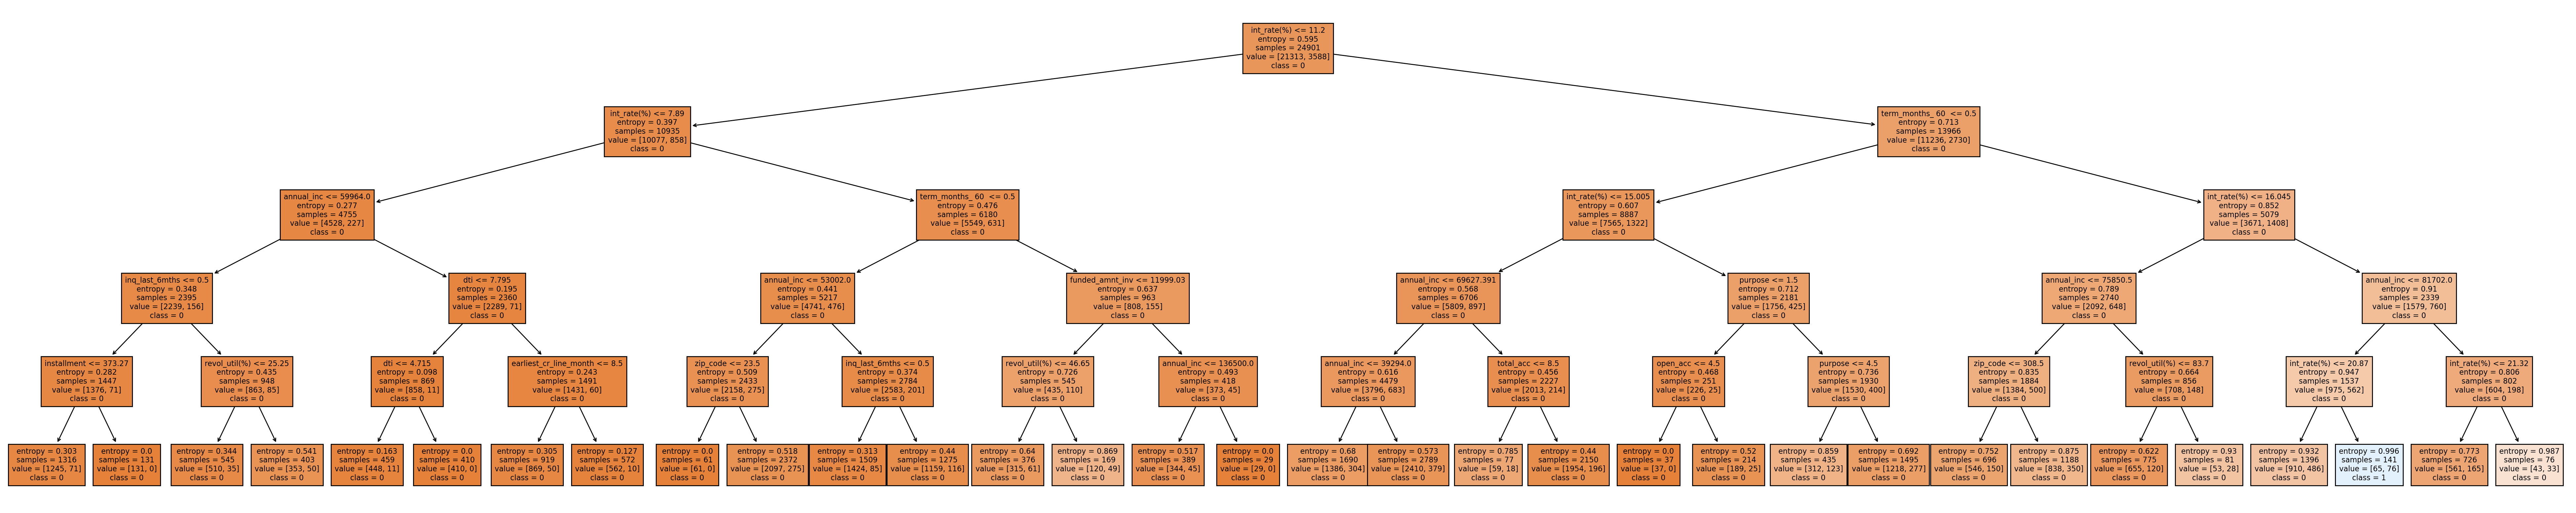

In [83]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,10), dpi=200)
tree.plot_tree(m_cart, feature_names = X_train1.columns, class_names=['0','1'] , filled = True, fontsize = 8);
fig.savefig('cart_tree.png')

In [149]:
#SMOTE result, but the CART is model is still the same, maybe use SMOTE on OCT?
print("After Before Sampling, counts of label '1': {}".format(sum(y_test['loan_status'] == 1)))
print("After OverSampling, counts of label '1': {}".format(sum(y_test1 == 1)))


After OverSampling, counts of label '1': 2563
After OverSampling, counts of label '1': 15138


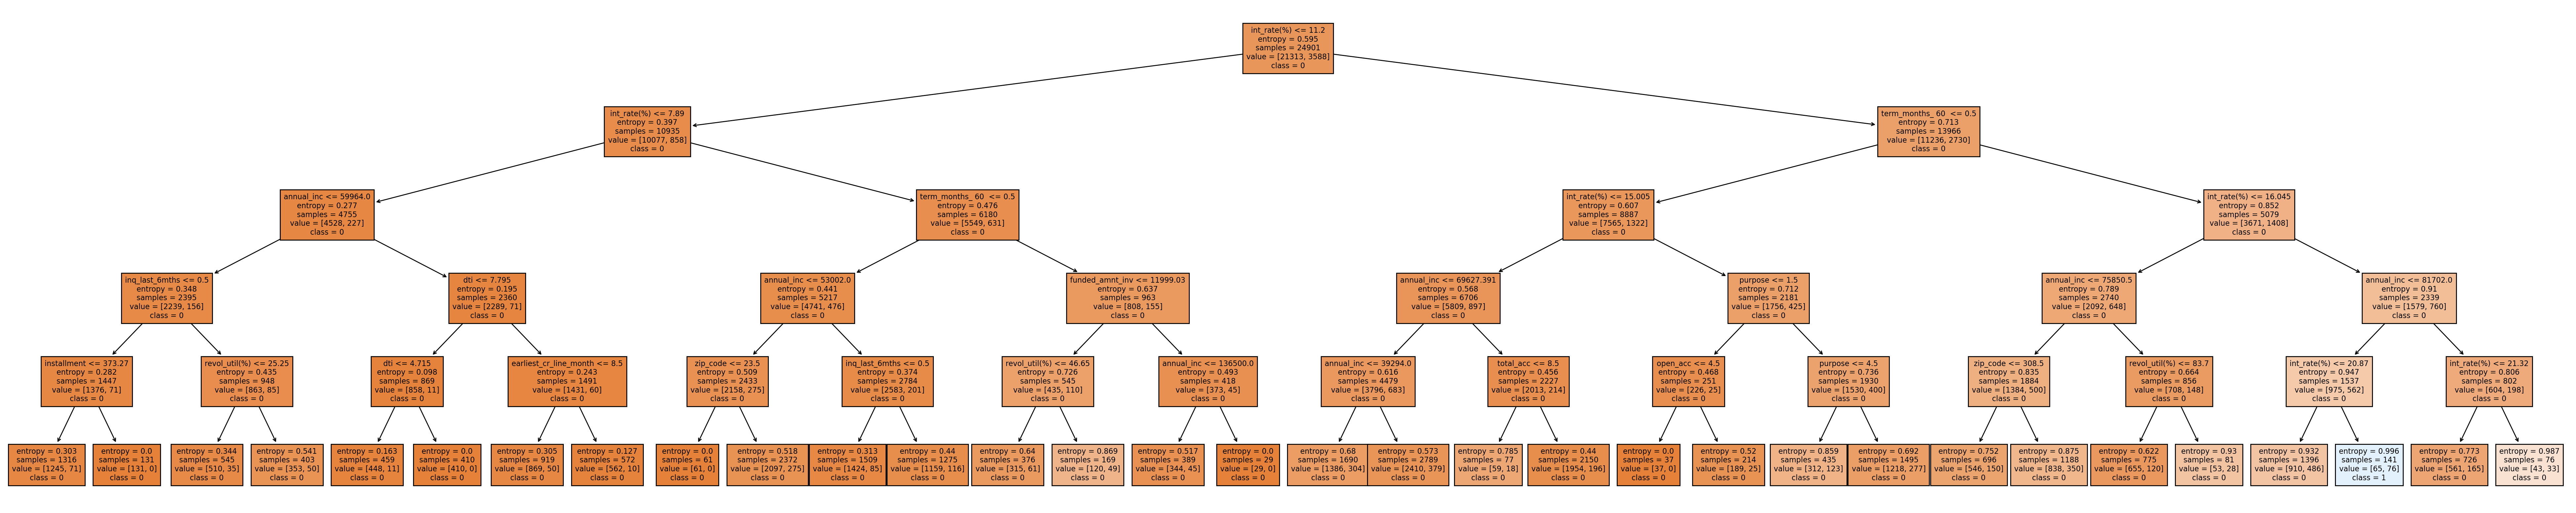

In [78]:
#CART , without SMOTE
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,10), dpi=200)

tree.plot_tree(m_cart, feature_names = X_train.columns, class_names=['0','1'] , filled = True, fontsize = 8);
fig.savefig('cart_tree.png')

# Prescriptive

In [85]:
pip install interpretableai

     |████████████████████████████████| 67 kB 956 kB/s eta 0:00:01
  Created wheel for interpretableai: filename=interpretableai-2.8.0-py3-none-any.whl size=37265 sha256=6317cb4a17207495f02cf4df22a970f2cea0a21bfcc8b974a60b94c3a9083d2c
  Stored in directory: /Users/shay/Library/Caches/pip/wheels/2d/db/44/8bdc0e918d244c0e5aeb80c36103c53ceb7a35c8f0843ddf07
Successfully built interpretableai
Note: you may need to restart the kernel to use updated packages.


In [87]:
from interpretableai import iai

FileNotFoundError: [Errno 2] No such file or directory: 'julia'